# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:| 
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

In [4]:
print ("Привет,Мир!") 
#ДАННАЯ ЗАПИСЬ ТРАДИЦИОННО ОСВАИВАЕТСЯ ПЕРВОЙ ПРИ ИЗУЧЕНИИ ЛЮБОГО ЯЗЫКА ПРОГРАММИРОВАНИЯ.
#ЭТОТ СВОЕОБРАЗНЫЙ РИТУАЛ ПОКАЗЫВАЕТ ГОТОВНОСТЬ И ЖЕЛАНИЕ ИЗУЧАТЬ НОВЫЕ ОБЛАСТИ ИНФОРМАТИКИ

Привет,Мир!


In [5]:
#импорт бибилиотек
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.fft import *
from scipy.signal import *

In [6]:
#глобальные консатнты и переменные
N = 12
n0= 3
v1=-0.5
v2=0.5
#задание сигнала икс и игрек
x = np.ones(N)
k=np.arange(x.size)
y=[] #пустой список

In [7]:
#блок вывода
print ("N =",N)
print("n0 =",n0)

N = 12
n0 = 3


In [8]:
#вычисление сигнала игрек
for i in range (0,N,1):
    y.insert(i,math.cos(2*3.14*i*n0/N)) #insert(позиция,элемент)-добавляет элемент в указанную позицию

In [9]:
#блок вывода
print('x = ', x)
print('k = ', k)
print('y = ', y)

x =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
k =  [ 0  1  2  3  4  5  6  7  8  9 10 11]
y =  [1.0, 0.0007963267107332633, -0.9999987317275395, -0.0023889781122815386, 0.9999949269133752, 0.003981623454078851, -0.9999885855671581, -0.005574258696310301, 0.9999797077049732, 0.0071668797991832804, -0.9999682933493399, -0.008759482722945482]


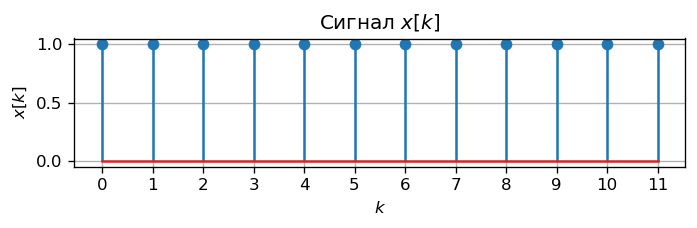

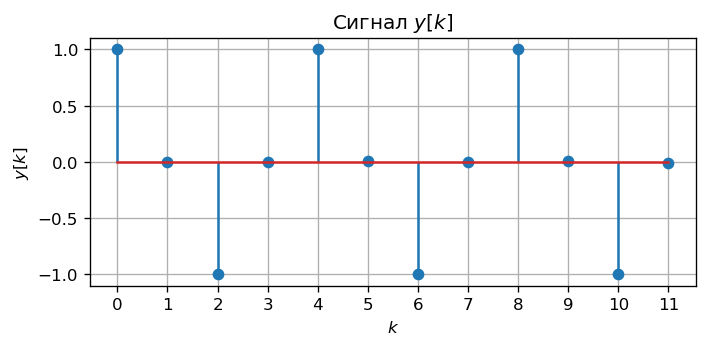

In [10]:
#Начало графического блока сигнала икс
figure1 = plt.figure(figsize=[6, 2], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, x)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$x[k]$")# подпись оси ординат
plt.title("Сигнал $x[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала икс

#Начало графического блока сигнала игрек
figure1 = plt.figure(figsize=[6, 3], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, y)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y[k]$")# подпись оси ординат
plt.title("Сигнал $y[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока игрек

In [11]:
#Вычисление модуля ДВПФ для сигнала икс по функции
def dtft(varyable, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(varyable, M)) #рписание функции ДВПФ
nu,X1 = dtft(x, M=1024)

In [12]:
#Блок обмана вас
max=0
for j in range (0,len(X1),1):
    if max < abs(X1[j]):
        max = abs(X1[j])
print (max)
print ("Поздравляю!Вас обманули!")

12.0
Поздравляю!Вас обманули!


In [13]:
#Вычисление модуля ДВПФ для сигнала икс по определению
#блок задания входных параметров 
X2=[]
step=( abs(v1) + v2 )/1024
print("шаг дискретизации = ",step)

шаг дискретизации =  0.0009765625


In [14]:
#тестовый блок проверки верности шага
for j in range (0,1025,1):
    TEST_varuable=v1+step*j
if TEST_varuable == v2:
    print("Поздравляю,шаг дискретизации выбран верно!, тестовая переменная равна", TEST_varuable)
    print("количество отсчетов равно", j)
else:
    print("К сожалению шаг дискретизации выбран неверно, рассогласование равно", v2-TEST_varuable)

Поздравляю,шаг дискретизации выбран верно!, тестовая переменная равна 0.5
количество отсчетов равно 1024


In [15]:
#блок вычислений
print("Максимум функции =",max)
print("Внимание!Вас все ещё обманывают!")
X2.clear()
for i in range(1,1025,1):
    if (math.sin((v1+i*step)*3.14)) != 0:
        buff=abs((math.sin(N*3.14*(v1+i*step)))/(math.sin((v1+i*step)*3.14)))
        X2.append(buff)
    else:
         buff=max
         X2.append(buff)

Максимум функции = 12.0
Внимание!Вас все ещё обманывают!


In [16]:
#блок вывода
print("X1 = ",X1)
print("длина X1 =",len(X1))
print("X2 = ",X2)
print("длина X2 =",len(X2))

X1 =  [0.        +0.j         0.00124192+0.03678644j 0.00496158+0.07339844j ...
 0.01114062-0.10966244j 0.00496158-0.07339844j 0.00124192-0.03678644j]
длина X1 = 1024
X2 =  [0.04633654521300238, 0.08305588422042653, 0.11966511593676817, 0.15611570199977712, 0.1923593084472634, 0.22834786800265713, 0.26403364202632684, 0.29936928205501323, 0.33430789085216517, 0.3688030828926862, 0.4028090442061666, 0.43628059150353654, 0.4691732305129265, 0.5014432134514908, 0.5330475955610086, 0.5639442906362206, 0.5940921254760919, 0.6234508931895107, 0.6519814052883286, 0.6796455425021551, 0.7064063042508228, 0.7322278567121797, 0.7570755794244911, 0.7809161103645811, 0.8037173894446968, 0.8254487003730138, 0.8460807108247075, 0.8655855108725894, 0.8839366496284328, 0.9011091700483164, 0.9170796418575553, 0.9318261925531056, 0.9453285364436872, 0.957568001690257, 0.9685275553119639, 0.9781918261251701, 0.9865471255856896, 0.9935814665069651, 0.9992845796295158, 1.0036479280196302, 1.0066647192779565

In [17]:
#блок проверки равенства длин двух способов
if len(X1) == len(X2):
   print("Длины X1 и X2 равны")
else:
    print("длины X1 и X2 не равны.Не отчаивайтесь,проверьте условие еще раз!")

Длины X1 и X2 равны


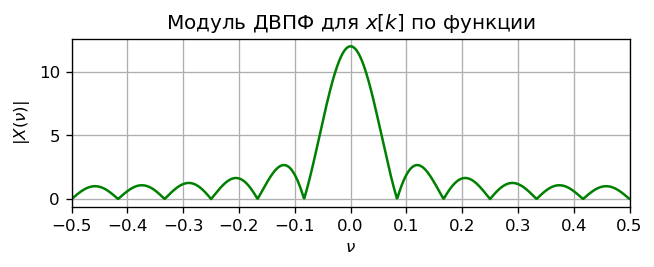

In [18]:
#Начало графического блока модуля ДВПФ сигнала икс по функции
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X1), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([v1, v2])
plt.title("Модуль ДВПФ для $x[k]$ по функции")
plt.grid()
#Конец графического блока модуля ДВПФ сигнала икс по функции

Вы были окончательно обмануты :3


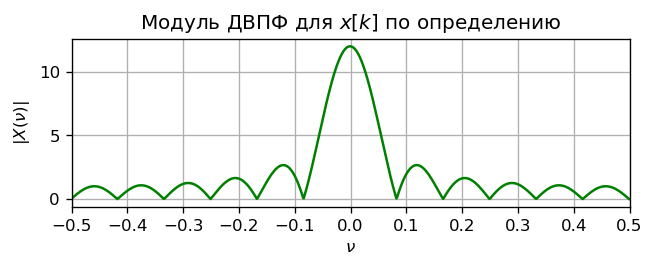

In [19]:
#Начало графического блока модуля ДВПФ сигнала икс по определению
plt.figure(figsize=[6, 4], dpi=120)
ax2 = plt.subplot(2, 1, 1)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, X2, 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([v1, v2])
plt.title("Модуль ДВПФ для $x[k]$ по определению")
plt.grid()
print("Вы были окончательно обмануты :3")
#Конец графического блока модуля ДВПФ сигнала икс по определению

In [20]:
#Вычисление модуля ДВПФ для сигнала игрек по функции
def dtft(varyable, M=1024*2):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(varyable, M)) #рписание функции ДВПФ
nu,Y1 = dtft(y, M=1024*2)
Y2=[]

In [21]:
#Блок обмана вас
max=0
for j in range (0,len(Y1),1):
    if max < abs(Y1[j]):
        max = abs(Y1[j])
print (max)
print ("Поздравляю!Вас снова обманули!")

5.999998731367235
Поздравляю!Вас снова обманули!


In [22]:
#блок определения шага дискретизации
step=( abs(v1) + v2 )/(1024*2)
print("шаг дискретизации = ",step)

шаг дискретизации =  0.00048828125


In [23]:
#тестовый блок проверки верности шага
for j in range (0,1025*2-1,1):
    TEST_varuable=v1+step*j
if TEST_varuable == v2:
    print("Поздравляю,шаг дискретизации выбран верно!, тестовая переменная равна", TEST_varuable)
    print("количество отсчетов равно", j)
else:
    print("К сожалению шаг дискретизации выбран неверно, рассогласование равно", v2-TEST_varuable)

Поздравляю,шаг дискретизации выбран верно!, тестовая переменная равна 0.5
количество отсчетов равно 2048


In [24]:
#блок вычислений
print("Максимум функции =",max)
print("Внимание!Вас все ещё повторно обманывают!")
Y2.clear()
for i in range(1,1025*2-1,1):
    if (math.sin((v1+i*step-0.25)*3.14)) and (math.sin((v1+i*step+0.25)*3.14)) != 0:
        buff=abs(0.5*((math.sin(N*3.14*(v1+i*step-0.25)))/(math.sin((v1+i*step-0.25)*3.14)))+0.5*((math.sin(N*3.14*(v1+i*step+0.25)))/(math.sin((v1+i*step+0.25)*3.14))))
        Y2.append(buff)
    else:
         buff=max
         Y2.append(buff)

Максимум функции = 5.999998731367235
Внимание!Вас все ещё повторно обманывают!


In [25]:
#блок вывода
print("Y1 = ",abs(Y1))
print("Длина Y1 = ", len(Y1))
print("Y2 = ",Y2)
print("Длина Y2 = ", len(Y2))

Y1 =  [0.00479691 0.01892174 0.03691453 ... 0.05509734 0.03691453 0.01892174]
Длина Y1 =  2048
Y2 =  [0.03949671003261758, 0.06547788066056089, 0.09143828811053889, 0.11736969950750287, 0.14326389040297893, 0.1691126471654257, 0.19490776936762688, 0.22064107217047274, 0.2463043887024583, 0.27188957243427203, 0.2973884995478041, 0.32279307129893486, 0.34809521637345264, 0.3732868932354574, 0.3983600924676046, 0.4233068391025505, 0.448119194944958, 0.4727892608834269, 0.49730917919171547, 0.5216711358186283, 0.545867362665925, 0.5698901398536496, 0.5937317979722428, 0.6173847203208254, 0.6408413451310357, 0.6640941677758279, 0.6871357429625866, 0.7099586869100079, 0.7325556795081102, 0.7549194664608001, 0.7770428614104019, 0.7989187480435668, 0.820540082177992, 0.84189989382936, 0.8629912892579519, 0.8838074529943594, 0.9043416498437453, 0.9245872268680984, 0.9445376153459448, 0.9641863327089724, 0.9835269844550381, 1.0025532660370362, 1.021258964727104, 1.039637961455655, 1.057684232624

In [26]:
#блок проверки равенства длин двух способов
if len(Y1) == len(Y2):
   print("Длины Y1 и Y2 равны")
else:
    print("длины Y1 и Y2 не равны.Не отчаивайтесь,проверьте условие еще раз!")

Длины Y1 и Y2 равны


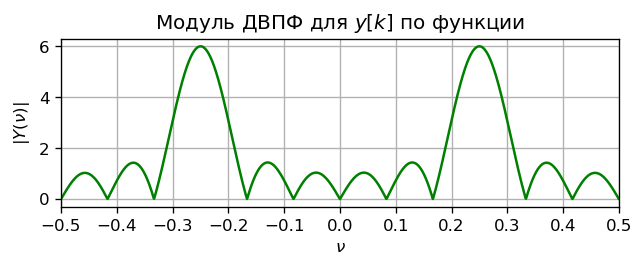

In [27]:
#Начало графического блока модуля ДВПФ сигнала игрек по функции
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(Y1), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([v1, v2])
plt.title("Модуль ДВПФ для $y[k]$ по функции")
plt.grid()
#Конец графического блока модуля ДВПФ сигнала игрек по функции

Вы были окончательно обмануты в последний раз:3


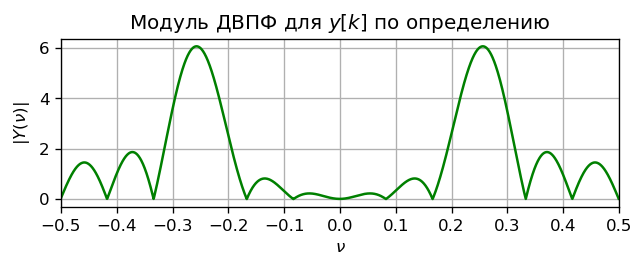

In [28]:
#Начало графического блока модуля ДВПФ сигнала игрек по определению
plt.figure(figsize=[6, 4], dpi=120)
ax2 = plt.subplot(2, 1, 1)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, Y2, 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([v1, v2])
plt.title("Модуль ДВПФ для $y[k]$ по определению")
plt.grid()
print("Вы были окончательно обмануты в последний раз:3")
#Конец графического блока модуля ДВПФ сигнала игрек по определению

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

In [30]:
N=12
x = np.ones(N)
k=np.arange(x.size)
print('x = ', x)
print('k = ', k)

x =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
k =  [ 0  1  2  3  4  5  6  7  8  9 10 11]


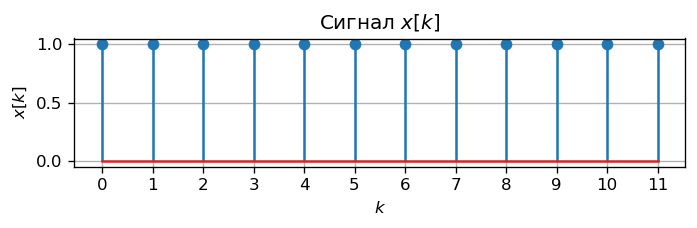

In [31]:
figure1 = plt.figure(figsize=[6, 2], dpi=120)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(k, x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
nu, X = dtft(x, M=1024)

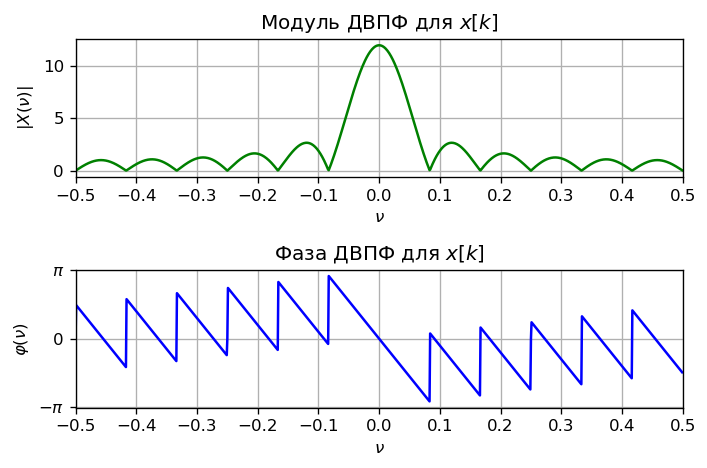

In [33]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, np.angle(X), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title("Фаза ДВПФ для $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
X.real

array([0.        , 0.00124192, 0.00496158, ..., 0.01114062, 0.00496158,
       0.00124192])

In [35]:
X.imag

array([ 0.        ,  0.03678644,  0.07339844, ..., -0.10966244,
       -0.07339844, -0.03678644])

In [36]:
np.angle(X)

array([ 0.        ,  1.53704875,  1.50330117, ..., -1.46955359,
       -1.50330117, -1.53704875])

In [37]:
abs(X)

array([0.        , 0.0368074 , 0.07356595, ..., 0.11022688, 0.07356595,
       0.0368074 ])

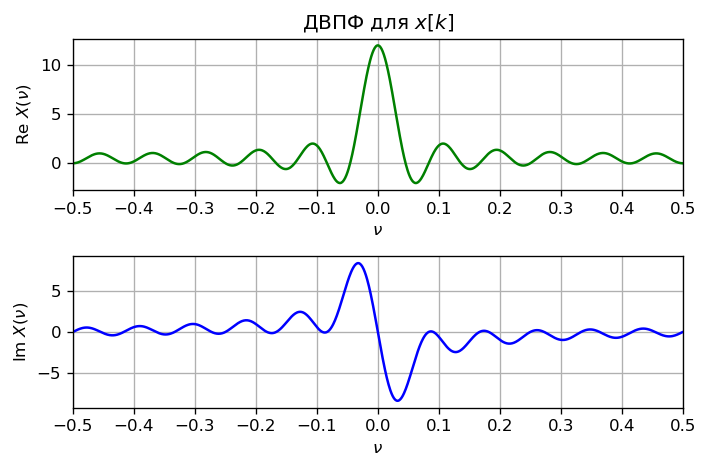

In [38]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, X.real, 'g')
plt.xlabel("$\\nu$")
plt.ylabel("Re $X(\\nu)$")
plt.xlim([-0.5, 0.5])
plt.title("ДВПФ для $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, X.imag, 'b')
plt.xlabel("$\\nu$")
plt.ylabel("Im $X(\\nu)$")
plt.xlim([-0.5, 0.5])
plt.grid()
plt.tight_layout()
plt.show()

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.